# Assignment 8: EDA

## 1. Importing Data & Libraries

In [ ]:
#ONLY RUN IF SKLEARN, MATPLOTLIB, AND SEABORN NOT INSTALLED
!python3 -m pip install matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
data = pd.read_csv('adult.data', header=None, names=column_names)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Makeing sure all rows don't have null values and dropping irrelavant columns


In [37]:
data= data.drop(columns='fnlwgt')

data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## 2. Exploratory Data Analysis (EDA) and Data Visualization

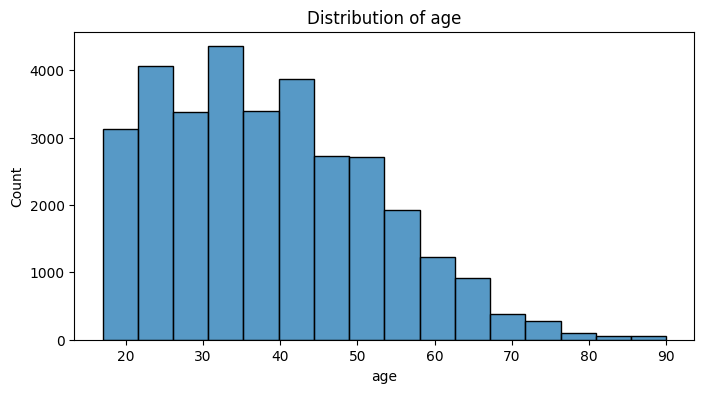

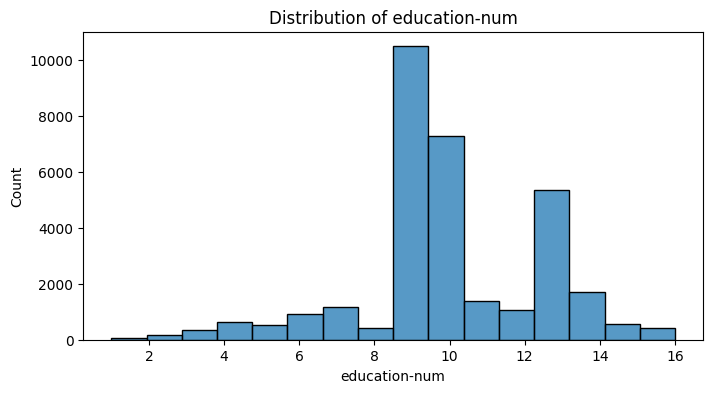

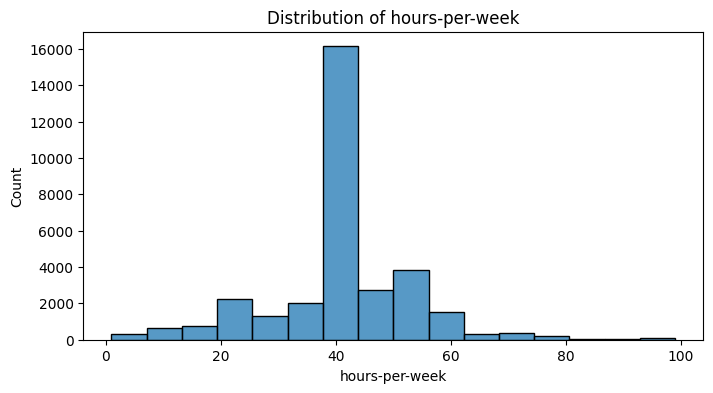

In [38]:
num_cols = ['age', 'education-num', 'hours-per-week']

# Histograms with KDE
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=16,)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

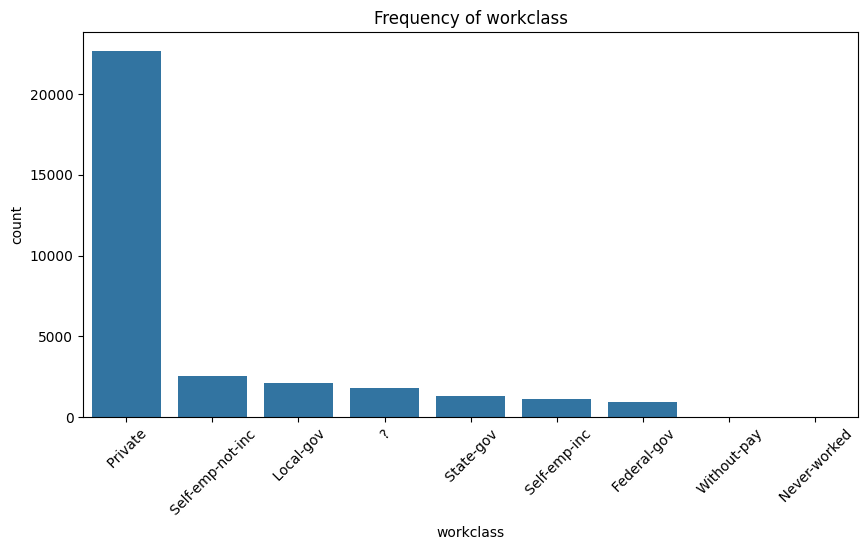

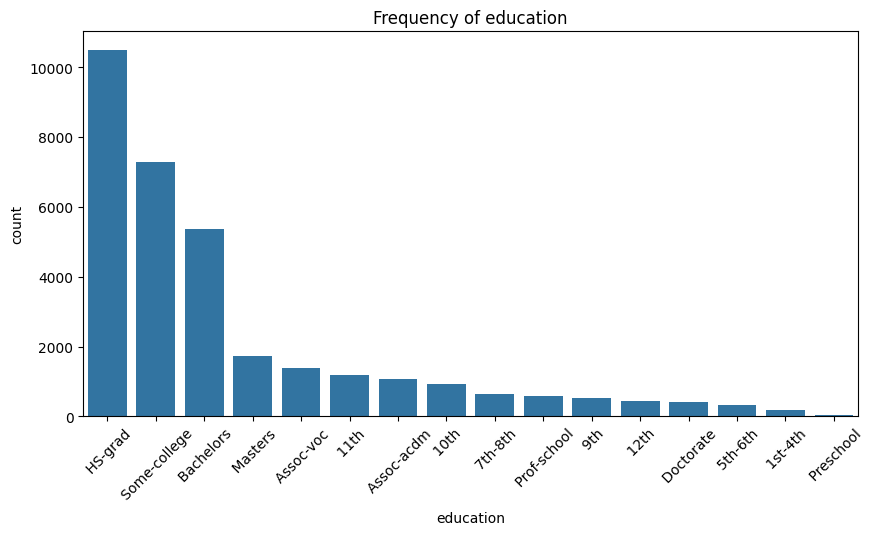

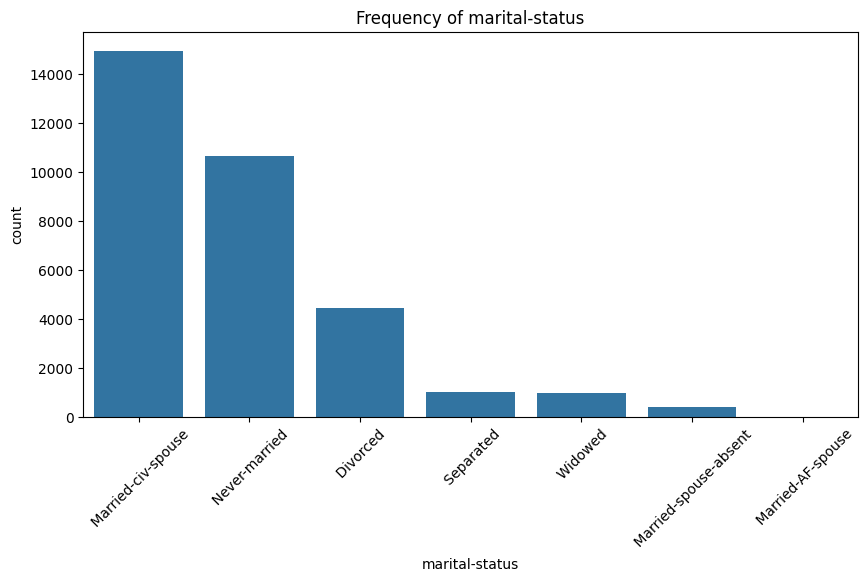

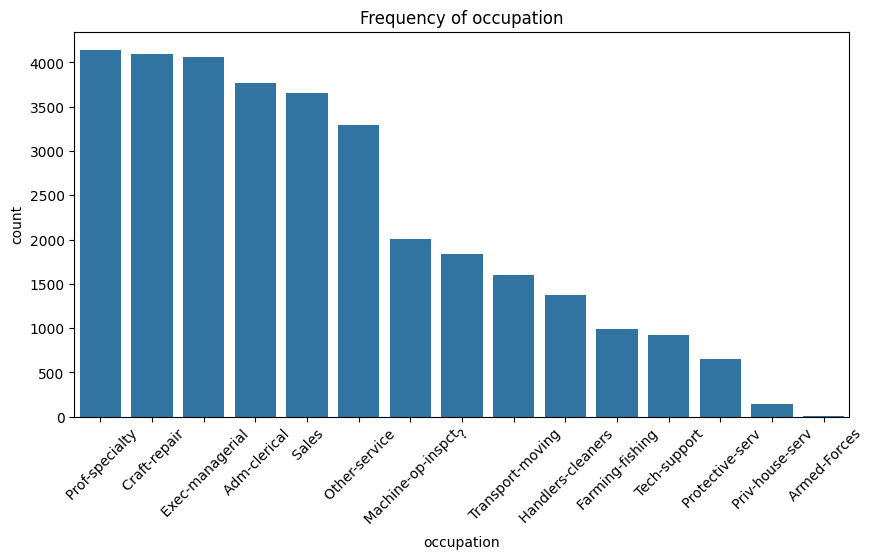

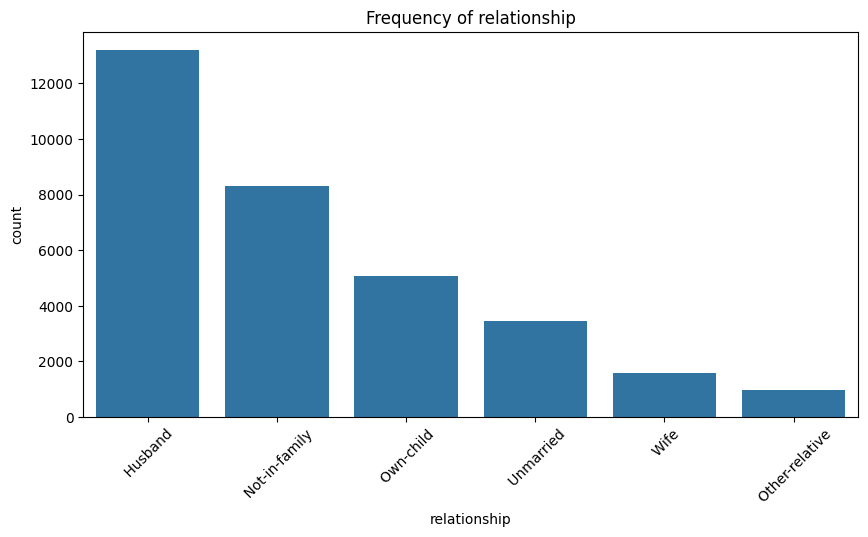

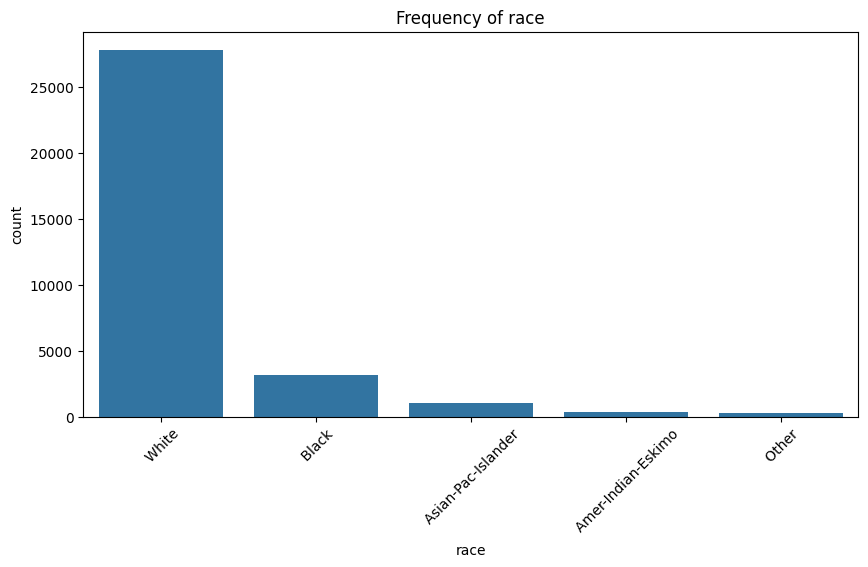

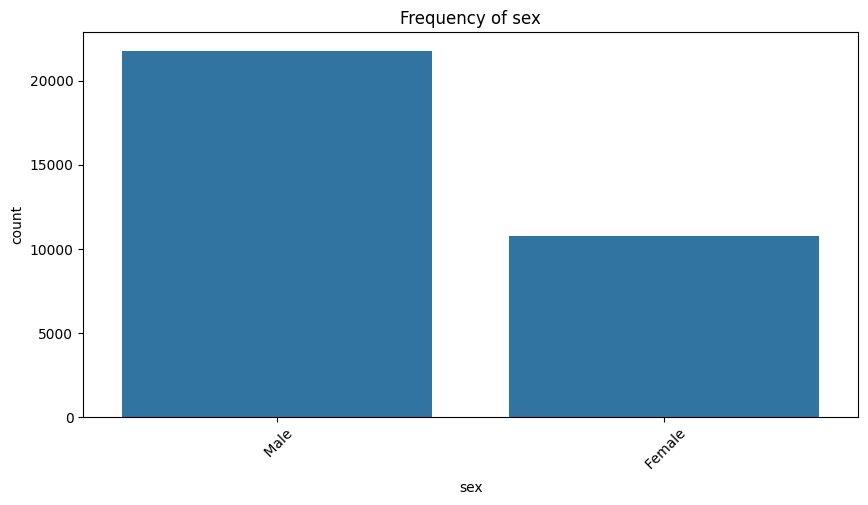

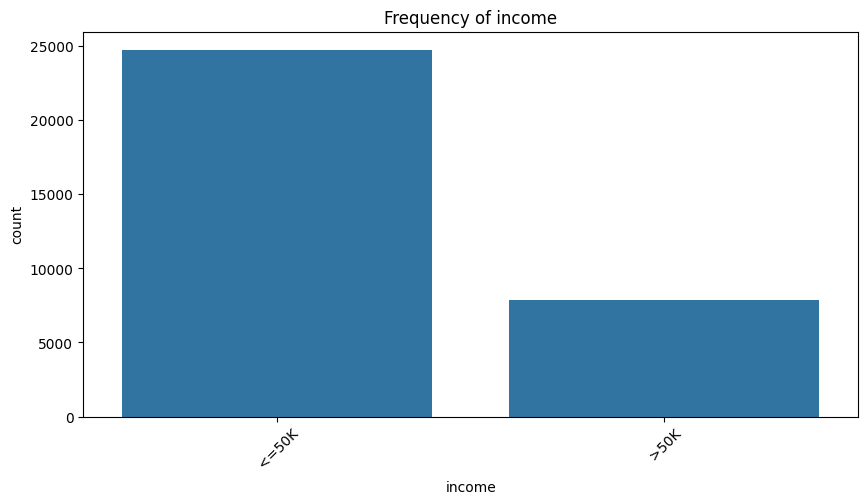

In [39]:
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'income']

# Count plots
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()


## 3. Hypothesis Formulation

### Hypothesis: Individuals with higher education levels and more experience (age) are more likely to earn over 50k annualy.

I believe this logic to be true because higher educated people have more specialized skills that give them the experience and knowledge needed to acquire higher paying jobs. In addition, those who spend more time learning will typically aim for higher returns in income.

I also believe that older people in the workforce are also more likely to make over 50k a year, because the older and more experienced you get at a field, the higher your position and salary. Basically, if you stay at a company long enough, you will have better chances at getting promoted

## 4. Hypothesis Testing

### Education vs. Income (Cross Tab)

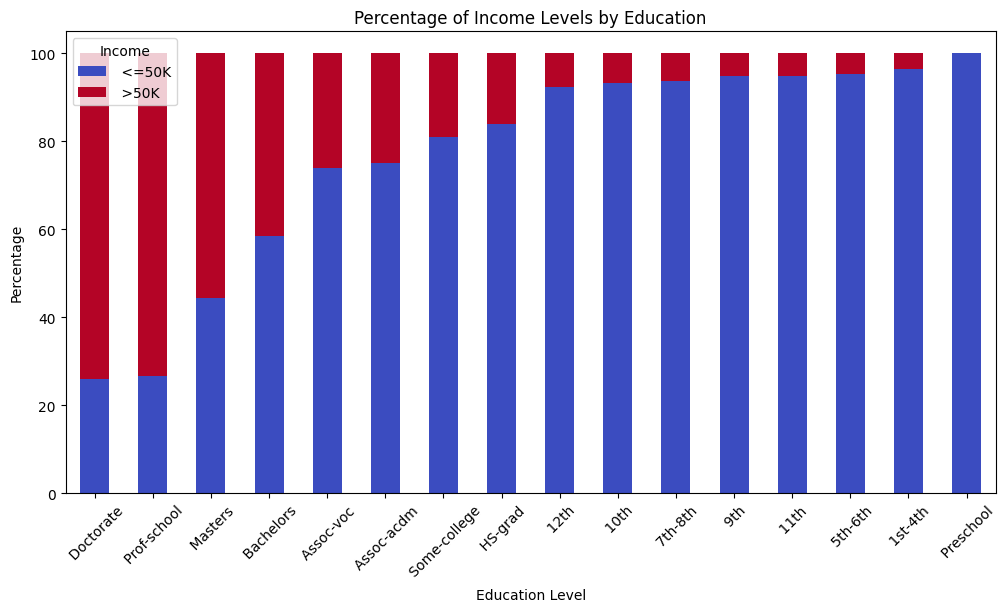

In [ ]:
# Create a cross-tabulation of education vs income
edu_income = pd.crosstab(data['education'], data['income'], normalize='index') * 100

# Sort by percentage of >50K income
edu_income = edu_income.sort_values(' >50K', ascending=False)

# Display the table
print(edu_income.round(2))

plt.figure(figsize=(12, 6))
edu_income.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

plt.title('Percentage of Income Levels by Education')
plt.ylabel('Percentage')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()


### Age Group vs. Income (cross tab)

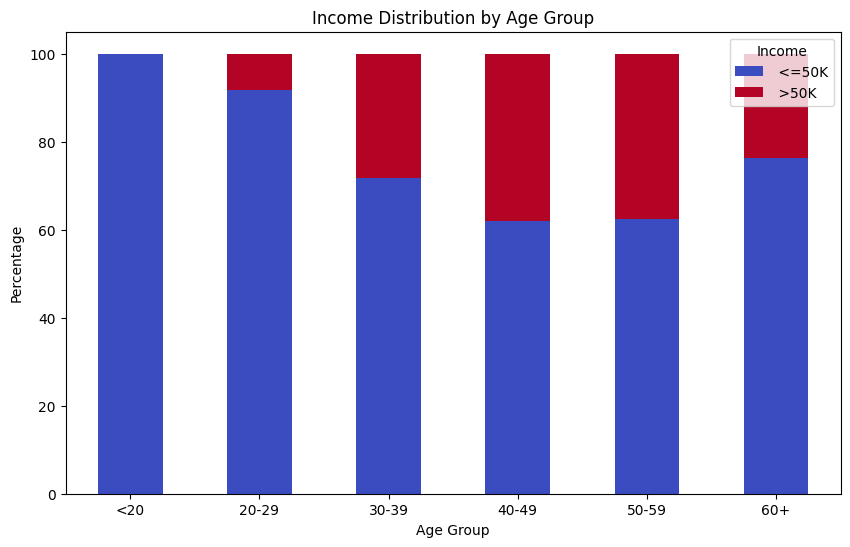

In [ ]:
# Bin ages into ranges for clarity
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# Create crosstab of age_group vs income
age_income_ct = pd.crosstab(data['age_group'], data['income'], normalize='index') * 100

# Stacked bar chart
age_income_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Income')
plt.xticks(rotation=0)
plt.show()


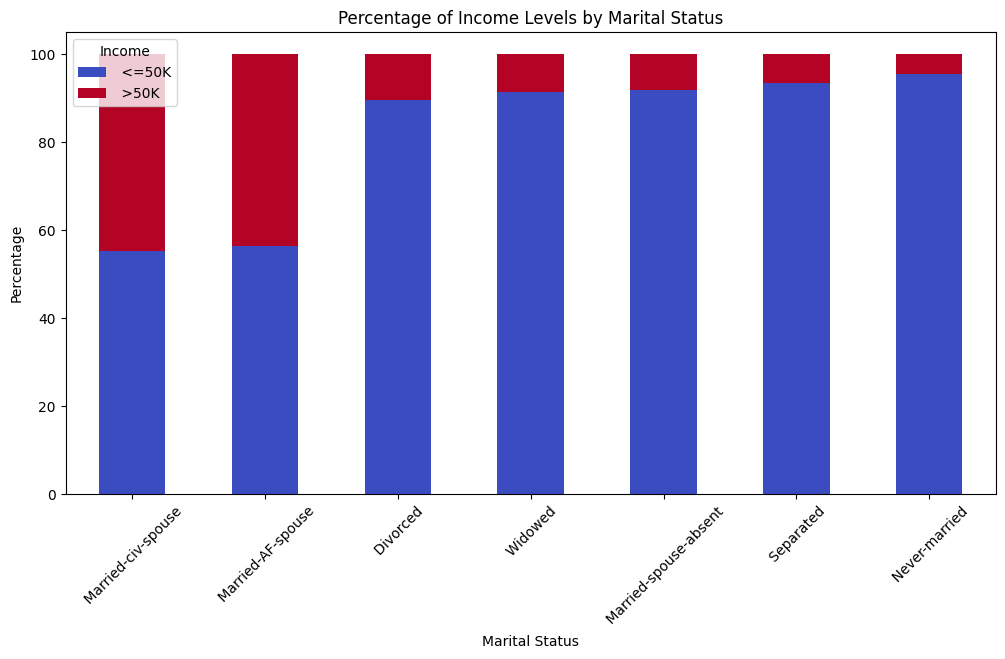

In [60]:
# Crosstab of marital status and income
marital_income_ct = pd.crosstab(data['marital-status'], data['income'], normalize='index') * 100
marital_income_ct = marital_income_ct.sort_values(' >50K', ascending=False)

# Stacked bar plot
marital_income_ct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Percentage of Income Levels by Marital Status')
plt.ylabel('Percentage')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()

### Linear Regression Model Accounting for Confounding Variables

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare your features and target
features = ['age', 'education-num', 'sex', 'hours-per-week', 'marital-status']
df_lr = data[features + ['income']].copy()

# One-hot encode categorical variables
df_lr['income'] = df_lr['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
df_lr_encoded = pd.get_dummies(df_lr, drop_first=True)

# Define X and y using all data
X = df_lr_encoded.drop('income', axis=1)
y = df_lr_encoded['income']

# Train model on the full dataset
lr = LinearRegression()
lr.fit(X, y)

# Evaluate the model on the same data
y_pred = lr.predict(X)

# Get the coefficients and match them with feature names
coefficients = pd.Series(lr.coef_, index=X.columns).sort_values(key=abs, ascending=False)

# Display the top influential features
print(coefficients)

print("R² Score:", r2_score(y, y_pred))
print("Mean Squared Error:", mean_squared_error(y, y_pred))



marital-status_ Married-AF-spouse        0.358010
marital-status_ Married-civ-spouse       0.308757
education-num                            0.047597
sex_ Male                                0.025390
marital-status_ Married-spouse-absent    0.021898
marital-status_ Separated                0.014000
marital-status_ Widowed                  0.009178
hours-per-week                           0.003410
marital-status_ Never-married            0.003216
age                                      0.003189
dtype: float64
R² Score: 0.30672388626623637
Mean Squared Error: 0.1267449571402926


## 5. Report & Documentation (Summary of Finding)

#### Education vs. Income (Cross Tab) 

This graph clearly shows the trend that individuals with higher degrees are more likely to make over 50k a year.
- Those with advanced degrees (like Bachelors, Masters, Doctorates) have the highest proportions of high-income individuals.
- In contrast, people with only high school or less are overwhelmingly represented in the ≤$50K income category.

#### Age Group vs. Income (Cross Tab)
Income potential increases steadily with age, peaking in the 40–49 and 50-59 age groups, and then declines in later years of retirement.
- This pattern reflects career progression and accumulated experience.
- The income after the age 60 declines, aligning with retirement age, where income typically reduces.

#### Linear Regression Model
A linear regression model was trained using predictors such as age, education, sex, hours worked, and marital status, with the goal of identifying their relationship to earning over $50K.

The Top Positive Predictors are:
- marital-status_Married-AF-spouse: +0.358
- marital-status_Married-civ-spouse: +0.309
- education-num: +0.048
- sex_Male: +0.025

Marriage (especially being married with spouse present), education level, and being male are all positively associated with earning a higher income. However, being married indicates being of older age (as older people are more likely to be married). 

So while age isn't a strong indicater in this model, it is definetly correlated to income as shown in the Age Group vs Income graph. 

## 6. Random Forrest Predictive Model (Extra Credit) 

In [52]:
from sklearn.model_selection import train_test_split


data_model = data.copy()

# Turn Income into a Dummy variable where it's 1 if income is >50k else its 0
data_model['income'] = data_model['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [53]:
# Identify categorical columns
cat_cols = data_model.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data_model, columns=cat_cols)

In [54]:
# Features and target
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.8476892369107938

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4942
           1       0.71      0.63      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



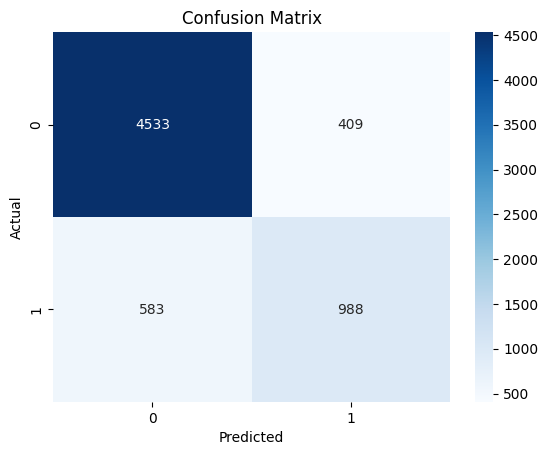

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test set
y_pred = rf.predict(X_test)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print()
print("Classification Report: ")
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The classification report shows that the Random Forest model performs well overall, achieving an accuracy of 85%.

- The model is especially good at identifying individuals who earn ≤50K, with a precision of 89% and a recall of 92%.

- For individuals earning >50K, the model is slightly less accurate, with a precision of 71% and a recall of 63%.

- The F1-score for class 1 is 0.67, indicating a somewhat decent  performance, but it's not perfect and has some flaws.

Despite this, the model provides a strong baseline and can be improved with techniques like class weighting or oversampling.

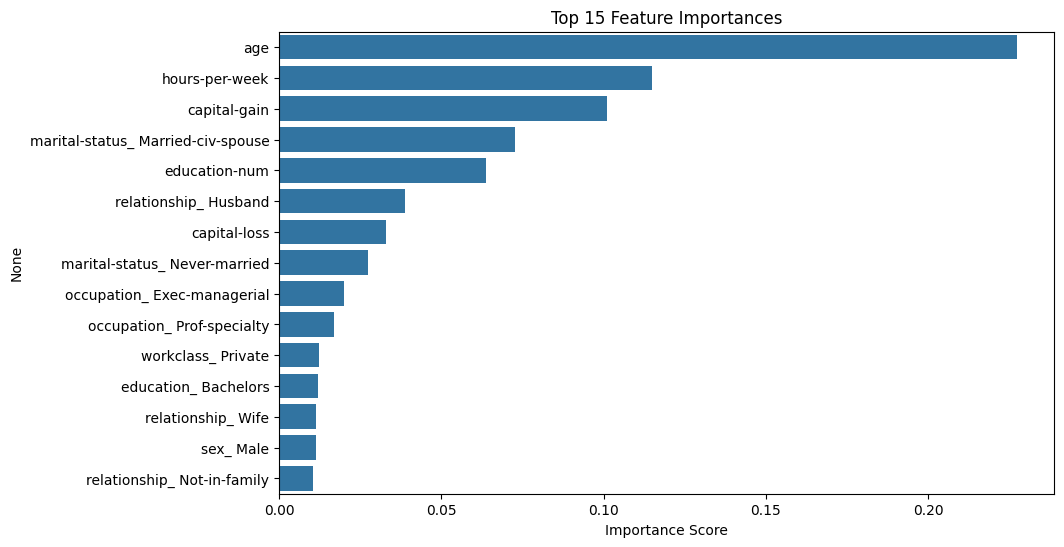

In [47]:
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.show()

The graph above shows the 15 most important features in predicting weather someone makes over 50k